### scipy를 이용한 확률분포 분석

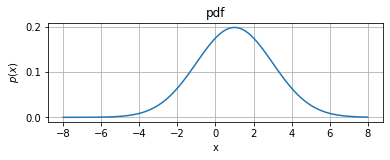

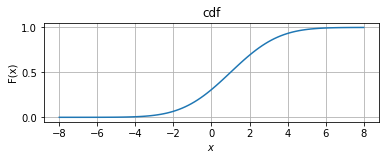

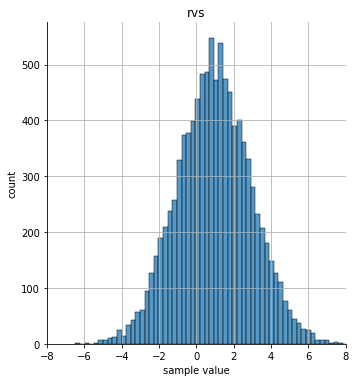

In [2]:
import scipy as sp; import scipy.stats
# 확률분포 클래스
# 이산 클래스
# bernoulli(베르누이), binom(이항분포), multinomial(다항분포)
# 연속 클래스
# uniform(균일분포), norm(정규분포), beta(베타분포), gamma(감마분포), t(t분포)
# chi2(카이제곱분포), f(f분포), dirichlet(디리클리분포), mutivariate_normal(다변수 정규분포)
# 위 명령들은 모두 stats 서브패키지에 포함되어 있음.

# 모수지정
# 대부분 같은 모수를 가짐.
# loc: 일반적인 분포의 기대값, scale: 일반적으로 분포의 표준편차
# 기대값1 표준편차2인 정규분포 객체 만들기 
rv=sp.stats.norm(loc=1,scale=2)

# 확률분포 메서드
# pmf: 확률질량함수, pdf: 확률밀도함수, cdf: 누적분포함수, ppf: 누적분포함수의 역함수, sf :생존함수 =1-누적분포함수
# isf: 생존함수의 역함수, rvs:랜덤 표본 생성

# 확률밀도함수
import numpy as np; import matplotlib.pyplot as plt
plt.subplot(211)
xx=np.linspace(-8,8,100)
pdf=rv.pdf(xx)
plt.plot(xx,pdf)
plt.xlabel('x'); plt.ylabel('$p(x)$'); plt.title('pdf')
plt.grid(True); plt.show()

# 누적분포함수
plt.subplot(212)
cdf=rv.cdf(xx)
plt.plot(xx,cdf); plt.title('cdf')
plt.xlabel('$x$'); plt.ylabel('F(x)')
plt.grid(True); plt.show()

# 무작위 표본 생성
# 인수 size:표본 생성시 생성될 표본 크기, random_state:표본 생성시 사용되는 시드값
rv.rvs(size=(3,5),random_state=0)
import seaborn as sns
sns.displot(rv.rvs(size=10000,random_state=0))
plt.title('rvs'); plt.xlabel('sample value'); plt.ylabel('count')
plt.xlim(-8,8); plt.grid(True); plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


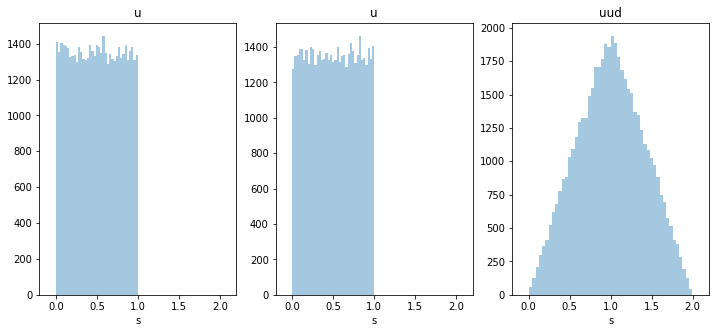

In [3]:
# 변환 확률변수의 시물레이션
# 확률변수의 표본을 가공하여 만들어진 변환 확률변수의 확률분포
rv1=sp.stats.uniform(); rv2=sp.stats.uniform()
np.random.seed(0)
N=50000
x_1=rv1.rvs(N); x_2=rv2.rvs(N); x_3=x_1+x_2
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.distplot(x_1, kde=False); plt.title("u"); plt.xlabel("s"); plt.xlim(-0.2, 2.2)
plt.subplot(132)
sns.distplot(x_2, kde=False); plt.title("u"); plt.xlabel("s"); plt.xlim(-0.2, 2.2)
plt.subplot(133)
sns.distplot(x_3, kde=False); plt.title("uud"); plt.xlabel("s"); plt.xlim(-0.2, 2.2)

plt.show()

### 베르누이분포와 이항분포

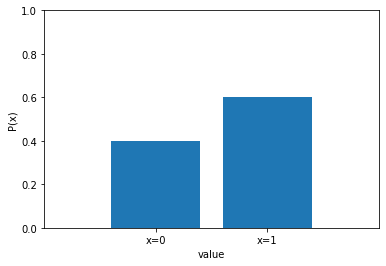

In [4]:
# 베르누이 시행
# 결과가 두 가지 중 하나로만 나오는 시행(이진분류문제)

# 베르누이 확률변수
# 시행의 결과를 0 or 1 로 바꾼 것을 베르누이 확률변수라고 함

# 베르누이 확률분포
# 어떤 확률변수 X가 베르누이 분포에 의해 발생되면 X~B(x;μ)라고 씀
# 확률질량함수는 B(x;μ)= μ if x=1, 1-μ if x=0   여기서 μ는 1이나올 확률을 의미함 = p
# 하나의 수식으로 쓰면 B(x;μ)=μ^x*(1-μ)^(1-x) =p^x*q^(1-x)

# scipy를 사용한 베르누이 확률변수의 시물레이션
p=0.6; rv=sp.stats.bernoulli(p)
xx=[0,1]
plt.bar(xx,rv.pmf(xx))
plt.xlim(-1,2); plt.ylim(0,1)
plt.xticks([0,1],['x=0','x=1'])
plt.xlabel('value'); plt.ylabel('P(x)')
plt.show()

# 베르누이분포의 모멘트
# E[X]=p=np.mean , V[X]=pq=np.var(,ddof=1)

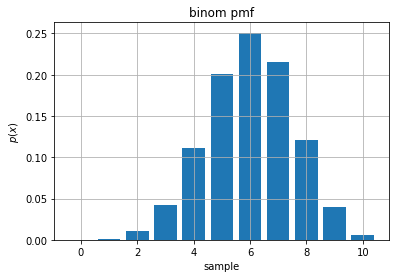

In [5]:
# 이항분포
# 성공확률 p의 베르누이 시행을 N번 반복하는 경우, N번 중 성공한 횟수를 확률변수 X라 하면
# 이 확률변수를 이항분포를 따르는 확률변수라 하며 X~B(x;N,p)로 나타냄
# B(x;N,p)=NCx*p^x*q^(n-x)
# NCx=N!/(x!(N-x)!)

# scipy를 이용한 이항분포의 시뮬레이션
N=10; p=0.6; rv=sp.stats.binom(N,p)
xx=np.arange(N+1)
plt.bar(xx,rv.pmf(xx),align='center')
plt.xlabel('sample'); plt.ylabel('$p(x)$')
plt.title('binom pmf'); plt.grid(True); plt.show()

# 이항분포의 모멘트
# E[X]=np, V[X]=npq

# 베르누이분포와 이항분포의 모수추정
# 공통모수를 갖는다. μ.hat=∑i=1~N xi /N = N_1/N 여기서 N_1은 1이 나온 횟수, N은 전체 데이터 수

# 베르누이분포의 활용
# 1. 분류예측 문제의 출력 데이터가 두 값으로 구분되는 경우 어느 값이 가능성이 높은지(베이지안)
# 2. 입력데이터가 두 개의 값으로 구분되는 경우 두 종류의 값이 나타나는 비율을 표현(빈도주의)


### 카테고리분포와 다항분포

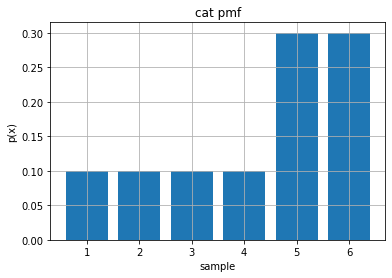

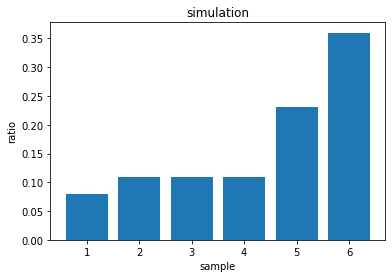

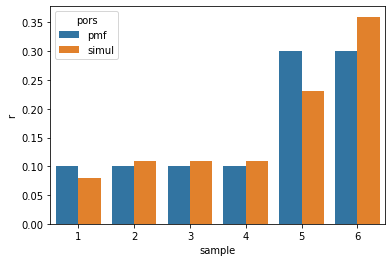

In [6]:
# 카테고리 확률변수
# 1~K의 K개 정숫값 중 하나가 결과값.(다중분류문제)
# 예시로 주사위는 K=6
# 원래 카테고리는 스칼라 값이지만 확률변수는 1과 0으로 이루어진 다차원벡터 사용
# x=1 -> x=(1,0,0,0,0,0)
# ... x=6(0,0,0,0,0,1)  이런 변환을 원핫인코딩이라함.
# 따라서 확률변수의 값을 x=(x1,x2,x3,x4,x5,x6)의 벡터로 표현. 원래는 열벡터지만 편의상 행벡터로 표현
# 제한조건으로는 xi= 0 or 1 이며 ∑k=1~K xk = 1 이여야 함

# 카테고리 확률분포
# Cat(x1,x2,...,xk:μ1,μ2,..,μk) = Cat(x;μ) x는 출력벡터, μ는 모수벡터
# = ∏k=1~K μ_k^x_k 따라서 K=2인 카테고리 분포의 확률질량함수는 베르누이분포의 확률질량함수와 같음

# 카테고리분포의 모멘트
# E[x_k]=μ_k, V[x_k]=μ_k*(1-μ_k)

# scipy를 이용한 카테고리분포의 시뮬레이션
import pandas as pd
p=[0.1,0.1,0.1,0.1,0.3,0.3]
rv=sp.stats.multinomial(1,p)
xx=np.arange(1,7)
xx_ohe=pd.get_dummies(xx) # 6x6의 원핫인코딩 벡터
plt.bar(xx,rv.pmf(xx_ohe.values)) # pmf의 인수로 벡터인 원핫인코딩 벡터를 넣어야함
plt.xlabel('sample'); plt.ylabel('p(x)')
plt.title('cat pmf'); plt.grid(True); plt.show()
# 100개의 표본값을 생성하는 시뮬레이션 결과
np.random.seed(0)
X=rv.rvs(100)
y=X.sum(axis=0)/float(len(X))
plt.bar(np.arange(1,7),y)
plt.title('simulation'); plt.xlabel('sample'); plt.ylabel('ratio')
plt.show()
# 비교
df=pd.DataFrame({'pmf':rv.pmf(xx_ohe.values),'simul':y},index=np.arange(1,7)).stack()
df=df.reset_index()
df.columns=['sample','pors','r']
sns.barplot(x='sample',y='r',hue='pors',data=df)
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python

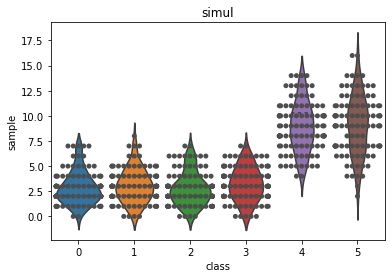

In [7]:
# 다항분포
# 카테고리 확률변수의 데이터가 여럿있으면 이 데이터의 합은 다항분포가 됨
# 수리적으로는 f(x1,x2,..,xk)=n!/(x1!*x2!*..*xk!)*(p1^x1*p2^x2*....pk^xk)
# = NC(x_1,..,x_k)*∏ k=1~K μ_K^x_k

# 다항분포의 모멘트
# E[x_k]=N*μ_k, V[x_k]=N*μ_k*(1-μ_k)

# scipy를 이용한 다항분포의 시뮬레이션
N=30; p=[0.1,0.1,0.1,0.1,0.3,0.3]; rv=sp.stats.multinomial(N,p)
np.random.seed(0); X=rv.rvs(100)
df=pd.DataFrame(X).stack().reset_index()
df.columns=['t','class','sample']
sns.violinplot(x='class',y='sample',data=df,inner='quartile')
sns.swarmplot(x='class',y='sample',data=df,color='.3')
plt.title('simul'); plt.show()

### 정규분포와 중심극한정리

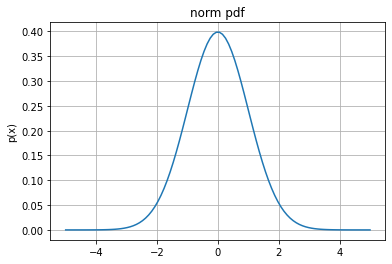

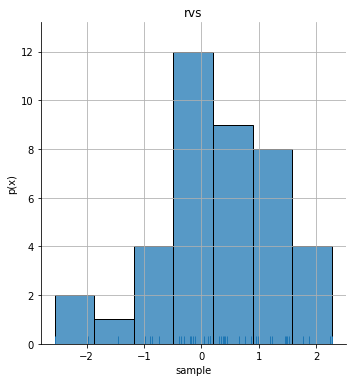

In [8]:
# 정규분포
# 자연 현상에서 나타나는 숫자를 확률모형으로 모형화할 때 사용
# 평균과 분산 두 모수로만 정의되며 확률밀도함수는 다음과 같이 정의됨
# (1/sqrt(2*π*σ^2))*exp(-(x-μ)^2/2*σ^2)
# 분산의 역수를 정밀도 β라고도 함 β=1/σ^2

# 표준정규분포
# 정규분포중에서도 평균이 0이고 분산이 1인 정규분포

# 정규분포의 pmf 성질
# x=평균 일때 확률밀도가 최대, x가 무한 혹은 음의무한으로 갈수록 확률밀도가 작아짐

# scipy를 사용한 정규분포의 시뮬레이션
rv=sp.stats.norm(0,1)
xx=np.linspace(-5,5,100)
plt.plot(xx,rv.pdf(xx))
plt.ylabel('p(x)'); plt.title('norm pdf'); plt.grid(True); plt.show()
np.random.seed(0)
x=rv.rvs(40)
sns.displot(x,rug=True,kde=False)
plt.title('rvs')
plt.xlabel('sample'); plt.ylabel('p(x)')
plt.grid(True); plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


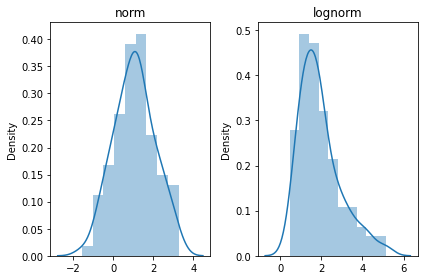

In [9]:
# 로그정규분포
# 데이터에 로그를 한 값이 정규분포가 되는 분포
# 이 경우 데이터는 항상 양수
np.random.seed(0)
p=1; rv=sp.stats.norm(loc=p)
x1=rv.rvs(100); s=0.5; x2=np.exp(s*x1)
fig, ax=plt.subplots(1,2)
sns.distplot(x1,ax=ax[0])
ax[0].set_title('norm')
sns.distplot(x2,ax=ax[1])
ax[1].set_title('lognorm')
plt.tight_layout(); plt.show()


In [10]:
# Q-Q플롯
# 분석할 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를
# 따르는지 검사하는 도구
# 1. 데이터를 정렬sort 한다
# 2. 하나하나의 표본 데이터가 전체 데이터 중의 몇 % 정도에 해당하는지 위치값을 구한다.
#    위치값은 특정 순위의 값이 나타날 가능성이 높은 값인 순서통계량을 이용한다.
# 3. 각 표본데이터의 위칫값이 정규분포의 cdf값이 되는 표준 정규분포의 표본값을 구한다.
#    즉 확률값에 대한 누적확률함수의 역함수를 구한다. = 표본 정규분포의 분위함수값.
# 4. 정렬된 표본 데이터와 분위수를 하나의 쌍으로 간주하여 2차원 공간에 점을 그린다.
# 5. 모든 표본에 대해 반복하여 완성한다.
# 일단 난 임포트가 안되서 포기함 ㅋㅋ

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


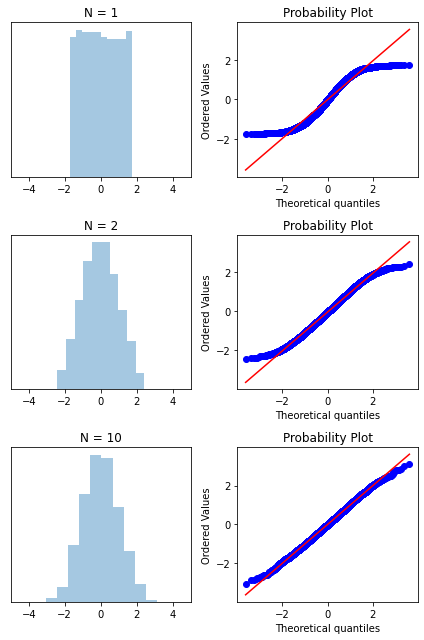

In [11]:
# 중심극한정리
# 여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상
# X1,X2,...,XN이 기댓값과 분산이 동일한 분포이며 서로 독립인 확률변수일 때,
# x.mean_N=(1/N)*(x1+...+xn)이고 이 확률변수를 X.mean_N이라 하면
# N개의 임의의 분포로부터 얻은 표본의 평균은 
#     N이 증가할수록 기댓값이 μ, 분산이 σ^2/N인 정규분포로 수렴
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
plt.tight_layout(); plt.show()


In [12]:
# 정규분포의 통계량 분포
# N개의 정규분포로부터 얻은 표본의 합은 N과 상관없이 E[X]=Nμ,V[X]=N*σ^2인 정규분포임

# 선형회귀모형과 정규분포
# 정규분포는 선형회귀모형에서 잡음을 모형화하는데 사용.
# 선형회귀모형은 입력변수 x1,..,xn 이 종속변수 y에 선형적으로 영향을 미치는 모형
# w1x1+...+wNxN≈y, y=w1x1+...+wNxN+ϵ
# 여기서 ϵ는 잡음을 의미하며 우리가 값을 측정할 수 없는 양을 뜻함. 잔차와는 다른 개념
# 사실상 입력변수 x는 무수히 많은데 측정하기 힘든 변수들을 뭉뚱그려 ϵ로 합쳐놓은것 ϵ= w(N+1)x(N+1)+...
# 보통 w0의 상수항을 추가하여 ϵ의 기대값을 0으로 만들어 정규분포로 가정함.

### t분포, 카이제곱분포, F분포

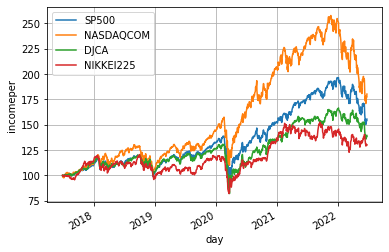

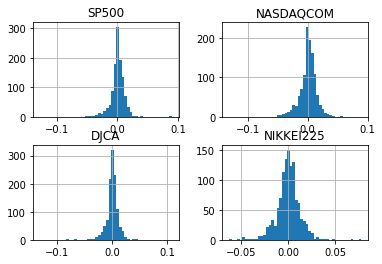

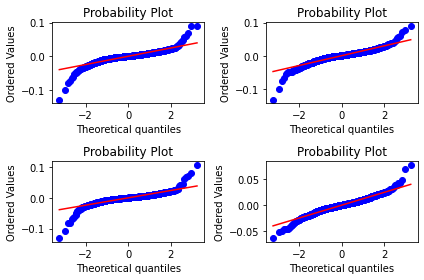

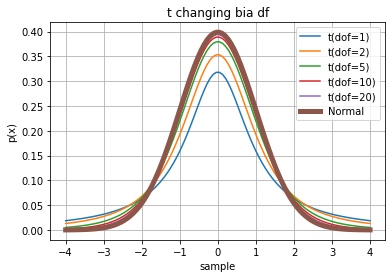

In [13]:
# t분포
# 정규분포와 흡사하지만 양 끝단의 비중이 더 큰 데이터들 = 극단적 현상이 더 자주 발생
import pandas_datareader.data as web
symbols=['SP500','NASDAQCOM','DJCA','NIKKEI225']
data=pd.DataFrame()
for sym in symbols:
    data[sym]=web.DataReader(sym,data_source='fred')[sym]
data=data.dropna()
(data/data.iloc[0]*100).plot()
plt.xlabel('day'); plt.ylabel('incomeper')
plt.grid(True); plt.show()
log_return=np.log(data/data.shift(1))
log_return.hist(bins=50)
plt.show() # 일간 수익률을 히스토그램으로 보면 정규분포와 비슷해 보임
for i, sym in enumerate(symbols):
    ax=plt.subplot(2,2,i+1)
    sp.stats.probplot(log_return[sym].dropna(),plot=ax)
plt.tight_layout(); plt.show() # 확인해보면 fat tail을 보이는 데이터 모형임을 확인 할 수 있음
# 이런 모형에 적합한 것이 t분포.
# 수리식은 넘어감 봐도모름
# sp.stats.t(df,loc,scale) df:자유도,loc:기대값,scale:표준편차
# 자유도는 2이상의 자연수를 사용함. 1인경우는 코시분포
# 자유도가 클수록 정규분포에 수렴함
xx=np.linspace(-4,4,100)
for df in [1,2,5,10,20]:
    rv=sp.stats.t(df=df)
    plt.plot(xx,rv.pdf(xx),label=('t(dof=%d)'%df))
plt.plot(xx,sp.stats.norm().pdf(xx),label='Normal',lw=5)
plt.title('t changing bia df')
plt.xlabel('sample'); plt.ylabel('p(x)'); plt.grid(True)
plt.legend(); plt.show()

# t분포의 기대값과 분산
# E[X]=μ,V[X]=ν/(λ(ν−2))

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


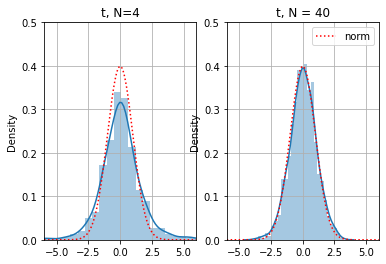

In [15]:
# t 통계량
# 정규분포로부터 얻은 N개의 표본 x1,..,xn에서 계산한 표본평균을 표본표준편차로 정규화한 값
# 자유도가 N-1인 t분포를 이룬다.
# t=(x.mean-μ)/s/squr(N) x.mean=표본평균 s=표본표준편차(비편향)
# 시뮬레이션을 사용한 비교
np.random.seed(1) 
rv=sp.stats.norm()
M=1000
plt.subplot(1,2,1)
N=4
x1=rv.rvs((N,M))
xbar1=x1.mean(axis=0); xstd1=x1.std(axis=0,ddof=1)
x= xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x,kde=True)
xx=np.linspace(-6,6,1000)
plt.plot(xx,rv.pdf(xx),'r:',label='norm')
plt.xlim(-6,6); plt.ylim(0,0.5); plt.title('t, N=4')
plt.grid(True); plt.legend
plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0); xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
plt.plot(xx, rv.pdf(xx), 'r:', label="norm")
plt.xlim(-6, 6); plt.ylim(0, 0.5); plt.title("t, N = 40")
plt.grid(True); plt.legend(); plt.show()
# 자유도가 높을수록 정규분포와 유사해짐

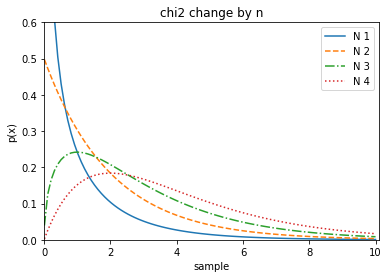

In [16]:
# 카이제곱분포
# N개의 표본들을 제곱합하여 양수값만을 가지는 분포
# χ2(x;ν) t분포처럼 자유도 모수를 갖는다.
xx=np.linspace(0.01,10,100)
dfs=np.arange(1,5)
lss=['-','--','-.',':']
for df, ls in zip(dfs,lss):
    rv=sp.stats.chi2(df=df)
    plt.plot(xx,rv.pdf(xx),ls=ls,label=('N %d'%df))
plt.xlim(0,10.1); plt.ylim(0,0.6); plt.title('chi2 change by n')
plt.xlabel('sample'); plt.ylabel('p(x)'); plt.legend(); plt.show()
# 특이한 점은 n>2 이면 0근처 값이 가장 많이 발생하는것이 아닌 0보다 큰 어떤 수가 더 흔하게 발생함
# (대충 1보다 작은 1근처 값에서 많이 발생한다)

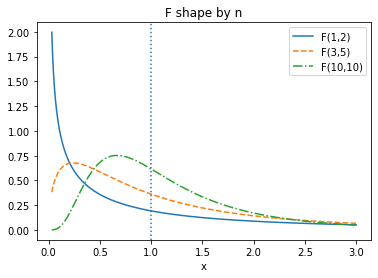

In [17]:
# F분포
# t분포와 카이제곱분포는 확률 변수 X로부터 나온 N개의 표본으로 만들 수 있었음
# 이와 비슷하게 카이제곱분포를 따르는 독립의 두개의 확률변수의 확률변수표본을 각각 x1,x2라고 할 때
# 이를 각각 N1,N2(F분포의 자유도 모수)로 나눈 뒤 비율을 구하면 F분포가 된다.
# t분포의 표본값을 제곱한 값은 F분포를 따른다. t(N)^2=F(1,N)
xx=np.linspace(0.03,3,1000)
plt.plot(xx,sp.stats.f(1,2).pdf(xx),ls='-',label='F(1,2)')
plt.plot(xx,sp.stats.f(3,5).pdf(xx),ls='--',label='F(3,5)')
plt.plot(xx,sp.stats.f(10,10).pdf(xx),ls='-.',label='F(10,10)')
plt.axvline(1,ls=':'); plt.xlabel('x'); plt.title('F shape by n')
plt.legend(); plt.show()
# N1,N2가 같을때 1이 아닌 다른 수가 더 흔하게 발생하며 이러한 현상은 N1,N2값이 커지면 사라지고 1근처에서 많이 발생함

# 활용
# t분포: 추정된 가중치에 대한 확률분포
# 카이제곱분포: 오차 제곱합에 대한 확률분포
# F분포: 비교 대상이 되는 선형모형의 오차 제곱합에 대한 비율의 확률분포

### 다변수정규분포

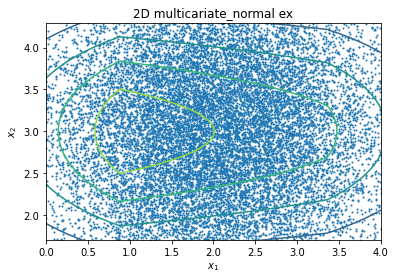

In [43]:
# 다변수정규분포의 확률밀도함수
# 모수로 차원D 평균벡터μ 와 공분산행렬 Σ를 가짐
# N(x;μ,Σ)=(1/(2π)^(D/2)*|Σ|^(1/2))exp((-1/2)*(x-μ)^T*Σ^(−1)*(x−μ)) 시발 왤캐 길어
# x: 확률변수벡터 μ: 평균벡터 Σ: 공분산행렬
# 여기서 공분산행렬은 양의 정부호인 대칭행렬 > 역행렬 존재 공분산행렬의 역행렬 Σ^(−1)를 정밀도행렬이라 함

# 예제
# x=np.array([x1, x2]), μ=np.array([2,3]), Σ=np.array([[1,0],[0,1]]) 이러면 D=2
# 따라서 |Σ|=1, Σ^(-1)=np.array([[1,0],[0,1]])
# 이 경우 N(x1,x2)=(1/2π)*exp((-1/2)*((x1-2)^2+(x2-3)^2))
mu=[2,3]; cov=[[1,0],[0,1]]
rv=sp.stats.multivariate_normal(mu,cov)
X=rv.rvs(20000)
xx=np.linspace(-1.6,120); yy=np.linspace(-1,6,150)
XX,YY=np.meshgrid(xx,yy)
plt.scatter(X[:,0],X[:,1],s=1)
plt.contour(XX,YY,rv.pdf(np.dstack([XX,YY])))
plt.axis('equal'); plt.xlim(0,4); plt.ylim(2,4); plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('2D multicariate_normal ex'); plt.show()

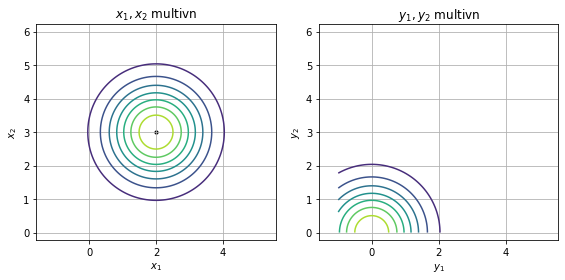

In [50]:
# 다변수정규분포와 고유값 분해
# 공분산 행렬이 양의 정부호인 대칭행렬이므로 대각화가 가능하다.
# 따라서 정밀도 행렬을 분해시 VΛ^(−1)*V.T 가 된다. Λ 는 고윳값행렬, V는 고유벡터행렬
# 이를 이용해보면 exp((−1/2)(x−μ).T*Σ^(−1)*(x−μ))=((−1/2)(V^(−1)(x−μ)).T*Λ^(−1)*(V^(−1)(x−μ)))가 되므로
# y= V^(−1)*(x−μ) 라고 지정시 exp((−1/2)*y.T*Λ^(−1)*y)로 exp(y^2/λ^2)의 배열이 된다.
mu=[2,3]; cov=[[1,0],[0,1]]; w,V=np.linalg.eig(cov) # w는 고유값, V는 역행렬
plt.figure(figsize=(8,4))
d=dict(facecolor='k',edgecolor='k',width=2)
plt.subplot(121)
xx=np.linspace(-1,5,120); yy=np.linspace(0,6,150)
XX,YY=np.meshgrid(xx,yy)
rv1=sp.stats.multivariate_normal(mu,cov)
plt.contour(XX,YY,rv1.pdf(np.dstack([XX,YY])))
plt.scatter(mu[0],mu[1],s=10,c='k')
plt.axis('equal'); plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('$x_1,x_2$ multivn'); plt.grid(True)
plt.subplot(122)
rv2=sp.stats.multivariate_normal((0,0),w) # 좌표변환
plt.contour(XX,YY,rv2.pdf(np.dstack([XX,YY])))
plt.axis('equal'); plt.xlabel('$y_1$'); plt.ylabel('$y_2$')
plt.title('$y_1,y_2$ multivn'); plt.grid(True)
plt.tight_layout(); plt.show()

In [ ]:
# 다변수정규분포의 조건부확률분포
# 다변수정규분포인 확률변수벡터 중 어떤 원소의 값이 주어지면 다른 확률변수의 조건부확률분포는 다변수정규분포임
# 즉 다변수정규분포 확률밀도함수를 자른 단면은 다변수 정규분포가 됨
# 예시로 X=[x1,x2], μ=[μ1,μ2], Σ=[[Σ11,Σ12],[Σ21,Σ22]], Λ=Σ^(−1)=[[Λ11,Λ12],[Λ21,Λ22]] 에서 x2가 관측되었을 때
# (x-μ).T*Σ^(−1)*(x-μ)=(x1-μ1|2).T*Λ11*(x1−μ1|2) +C(x2,μ,Σ)
# 여기서 μ1|2=μ1−Λ^(−1)11*Λ12*(x2−μ2)
# C는 x1을 포함하지 않는 항 = μ1.T*Λ11*μ1−2*μ1.T*Λ12*(x2−μ2)+(x2−μ2).T*Λ22*(x2−μ2)−(x2−μ2).T*Λ12.T*Λ11^(−1)*Λ12*(x2−μ2)
# p(x1|x2)=C′exp((x1−μ1|2).T*Λ11*(x1−μ1|2)) C'=exp(C)
# 즉 x2가 어떤 값으로 주어지면 x1은 조건부기댓값 μ1|2와 조건부공분산행렬Σ1|2을 가지는 다변수 정규분포가 됨
# 여기서 Σ1|2=Λ11^(−1)=Σ11−Σ12*Σ22^(−1)*Σ21

# 다변수정규분포의 주변확률분포
# = 다변수정규분포임
# 그냥 주변확률분포구하는 방법이랑 같은듯 적분이용
# x2의 주변확률분포의 기댓값은 원래 기대값벡터 중 x1 성분과 같고 공분산행렬은 분할행렬중 Σ11 성분과 같다


### 베타분포,감마분포,디리클레분포

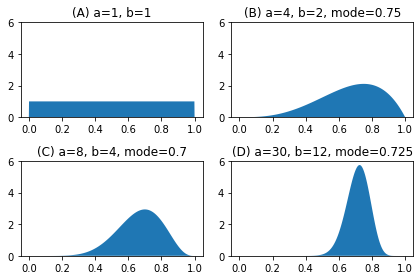

In [51]:
# 이 절의 분포들은 분포표현보다는 확신 혹은 신뢰의 정도를 표현하는데 주로 사용

# 베타분포
# a, b 라는 두 모수를 가지며 표본공간은 0과 1 사이의 실수, 즉 0과 1사이 표본값만 가질 수 있음
# Beta(x;a,b)=Γ(a+b)/(Γ(a)Γ(b))*x^(a−1)*(1−x)^(b−1)
# 여기서 Γ(a)=∫0~∞ x^(a−1)*e^(−x)dx
# 기댓값 E[x]=a/(a+b), 최빈값 mode=(a-1)/(a+b-2), 분산 V[x]=ab/((a+b)^2*(a+b+1))
xx=np.linspace(0,1,1000)
plt.subplot(221)
plt.fill_between(xx,sp.stats.beta(1.0001,1.0001).pdf(xx))
plt.ylim(0,6); plt.title("(A) a=1, b=1")
plt.subplot(222)
plt.fill_between(xx, sp.stats.beta(4, 2).pdf(xx))
plt.ylim(0, 6); plt.title("(B) a=4, b=2, mode={0}".format((4-1)/(4+2-2)))
plt.subplot(223)
plt.fill_between(xx, sp.stats.beta(8, 4).pdf(xx))
plt.ylim(0, 6); plt.title("(C) a=8, b=4, mode={0}".format((8-1)/(8+4-2)))
plt.subplot(224)
plt.fill_between(xx, sp.stats.beta(30, 12).pdf(xx))
plt.ylim(0, 6); plt.title("(D) a=30, b=12, mode={0}".format((30-1)/(30+12-2)))
plt.tight_layout(); plt.show()

# 베타분포와 베이지안 추정
# 베타분포는 사실 0부터 1까지의 값을 가질 수 있는 베르누이분포의 모수 μ 의 값을 베이지안 추정한 결과를 표현한 것
# 위의 결과는 베이지안 추정결과이고 아래는 각각의 베르누이분포의 모수에대한 추정
# A:모수μ 추정불가, B:모수μ 값이 0.75일 확률이 가장큼, C:모수μ 값이 0.7일 가능성이 가장 큼, D:모수μ 이 0.725일 확률이 가장 큼

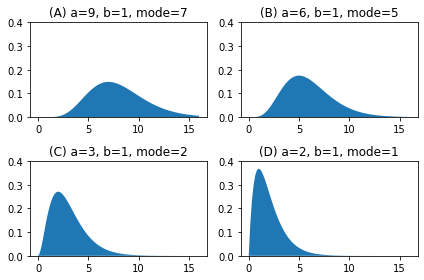

In [54]:
# 감마분포
# 모수의 베이지안 추정에 사용됨. 0~무한의 양수값을 추정
# Gam(x;a,b)=(1/Γ(a))*b^a*x^(a−1)*e^(−bx)
# E[X]=a/b, mode=(a-1)/b, V[X]=a/(b^2)
xx = np.linspace(0, 16, 100)
plt.subplot(221)
plt.fill_between(xx, sp.stats.gamma(8).pdf(xx))
plt.ylim(0, 0.4); plt.title("(A) a=9, b=1, mode=7")
plt.subplot(222)
plt.fill_between(xx, sp.stats.gamma(6).pdf(xx))
plt.ylim(0, 0.4); plt.title("(B) a=6, b=1, mode=5")
plt.subplot(223)
plt.fill_between(xx, sp.stats.gamma(3).pdf(xx))
plt.ylim(0, 0.4); plt.title("(C) a=3, b=1, mode=2")
plt.subplot(224)
plt.fill_between(xx, sp.stats.gamma(2).pdf(xx))
plt.ylim(0, 0.4); plt.title("(D) a=2, b=1, mode=1")
plt.tight_layout(); plt.show()
# 모수에 대한 추정
# A: 추정모수값이 8일가능성이 큼, B:추정모수값이 5일가능성이 큼, C:추정모수값이 2일가능성이 큼, D:추정모수값이 1일가능성이 큼
#       정확도 아주낮음                  정확도 낮음                    정확도 높음                정확도 아주 높음        

In [ ]:
# 디리클레분포
# 베타분포의 확장판. 0과 1사이의 값을 가지는 다변수 확률변수의 베이지안 모형
# ex K=3인 디리클레분포를 따르는 확률변수 (a,b,c)
# Dir(x;α)=Dir(x1,x2,⋯,xK;α1,α2,⋯,αK) =1/B(α1,α2,⋯,αK)* ∏i=1~K xi^(αi−1)
# x1,..xk는 표본값 벡터, α1,…,αK는 모수 벡터, B(α1,⋯,αK)=(∏i=1~K Γ(αi))/Γ(∑i=1~K αi)
# 제한조건은 0≤xi≤1, ∑i=1~K xi =1

# 베타분포와 디리클레분포의 관계
# 베타분포는 K=2인 디리클레분포임

# 디리클레분포의 모멘트
# E[X]=ak/∑α, mode=(αk−1)/(∑α −K), V[x]=αk*(∑α−αk)/((∑α)^2*(∑α+1))

C:\Users\user\AppData\Local\Temp\ipykernel_14228\923604735.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


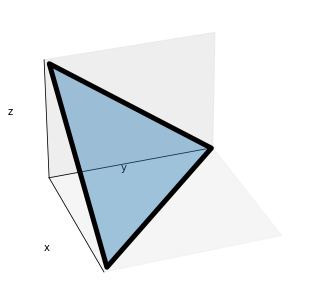

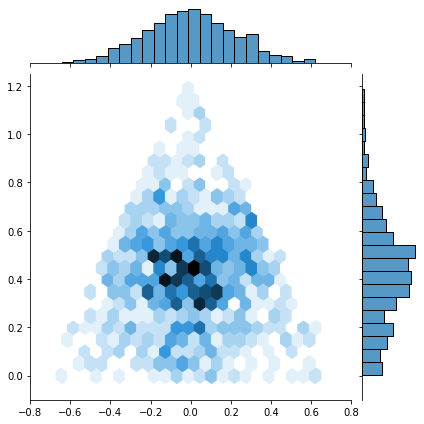

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


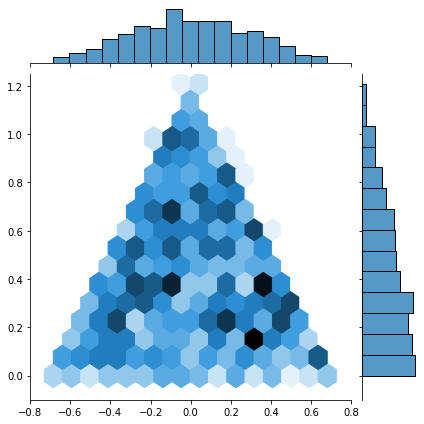

In [65]:
# 디리클레분포의 응용
# 예시로  x,y,z가 양의 난수일 때 항상 x+y+z=1이 되게하는 문제는 K=3, α1=α2=α3인 디리클레분포의 특수한경우임
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig=plt.figure()
ax=Axes3D(fig)
x=[1,0,0]; y=[0,1,0]; z=[0,0,1]
verts=[list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts,edgecolor='k',lw=5,alpha=0.4))
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.view_init(30,-20); tmp_planes=ax.zaxis._PLANES
ax.yaxis._PLANES=(
    tmp_planes[2],tmp_planes[3],
    tmp_planes[0],tmp_planes[1],
    tmp_planes[4],tmp_planes[5],
)
ax.zaxis._PLANES = (
    tmp_planes[2], tmp_planes[3],
    tmp_planes[0], tmp_planes[1],
    tmp_planes[4], tmp_planes[5],
)
# 이를 2차원에서 본것은 (디리클레분포가 아닌 단순방법)
def plot_triangle(X, kind):
    n1 = np.array([1, 0, 0])
    n2 = np.array([0, 1, 0])
    n3 = np.array([0, 0, 1])
    n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0])
    m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1)
    m2 = m2 / np.linalg.norm(m2)

    X1 = (X - n12).dot(m1)
    X2 = (X - n12).dot(m2)

    sns.jointplot(X1, X2, kind=kind, xlim=(-0.8, 0.8), ylim=(-0.1, 1.25))
    plt.show()
    np.random.seed(0)
X1 = np.random.rand(1000, 3)
X1 = X1 / X1.sum(axis=1)[:, np.newaxis]
plot_triangle(X1, kind="hex") # 확인시 중앙에 몰려있음 = 골고루 분포되어있지 않음

# α=(1,1,1)인 디리클레분포로 보면?
X2 = sp.stats.dirichlet((1, 1, 1)).rvs(1000)
plot_triangle(X2, kind="hex") # 골고루 퍼져있음을 확인가능 = 골고루 분포됨

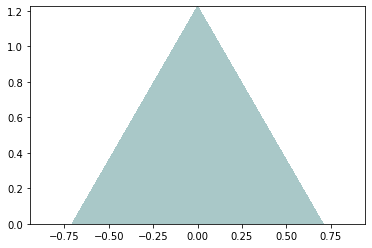

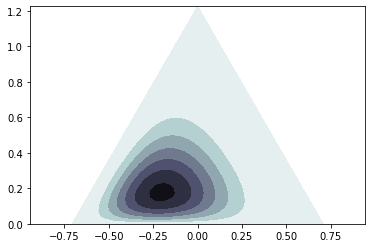

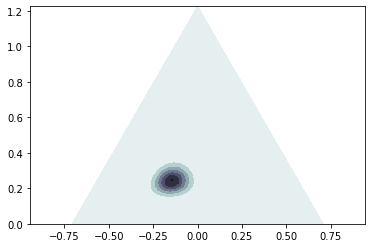

In [69]:
# 베이지안 추정
# 모수 α가 (1,1,1)이 아닌 경우에는 특정 위치에 분포가 집중되도록 할 수 있음
# 이 특성을 이용해 모수 벡터를 추정
def project(x):
    n1 = np.array([1, 0, 0]); n2 = np.array([0, 1, 0]); n3 = np.array([0, 0, 1]); n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0]); m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1); m2 = m2 / np.linalg.norm(m2)
    return np.dstack([(x - n12).dot(m1), (x - n12).dot(m2)])[0]

def project_reverse(x):
    n1 = np.array([1, 0, 0]); n2 = np.array([0, 1, 0]); n3 = np.array([0, 0, 1]); n12 = (n1 + n2) / 2
    m1 = np.array([1, -1, 0]); m2 = n3 - n12
    m1 = m1 / np.linalg.norm(m1); m2 = m2 / np.linalg.norm(m2)
    return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

eps = np.finfo(float).eps * 10
X = project([[1 - eps, 0, 0], [0, 1 - eps, 0], [0, 0, 1 - eps]])

import matplotlib.tri as mtri
triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
refiner = mtri.UniformTriRefiner(triang)
triang2 = refiner.refine_triangulation(subdiv=6)
XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1 - triang2.x - triang2.y])[0])

# 모수값을 추정하지 못한 경우
pdf = sp.stats.dirichlet((1, 1, 1)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone)
plt.axis("equal")
plt.show()
# 모수를 추정한 경우
pdf = sp.stats.dirichlet((3, 5, 2)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()
# 신뢰도가 높게 추정한 경우
pdf = sp.stats.dirichlet((30, 50, 20)).pdf(XYZ.T)
plt.tricontourf(triang2, pdf, cmap=plt.cm.bone_r)
plt.axis("equal")
plt.show()